# Beaver River diabase and anorthosite, and Greenstone Flow geochemistry data compilation

This notebook is for compiling geochemistry data for the Beaver River diabase and its anorthosite xenoliths in North Shore, MN, and comparing them with the data from the Greenstone Flow in Keweenaw Peninsula and Isle Royale. 

The data is soley taken from the PhD thesis by Doyle (2016). The measurements are all conducted using a JEOL JSM-6490LV scanning electron microscope equipped with an Oxford Inca X-Act energy dispersive X-ray spectrometer (SEM-EDS) at the Research Instrumentation Laboratory at UMD. 

## import software packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyrolite.plot import pyroplot
import seaborn as sns
from scipy import stats
from pyrolite.geochem.ind import REE
from pyrolite import geochem
from pyrolite.geochem.norm import get_reference_composition, all_reference_compositions
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [2]:
def get_sample_average(df):
    return df[df['Sample'] != 'Average'].reset_index(drop=True)

# load geochem files
cpx_cat = get_sample_average(pd.read_csv('../data/Geochem_compiled/Cpx_cat.csv'))
cpx_chem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Cpx_chem.csv'))
ol_cat = get_sample_average(pd.read_csv('../data/Geochem_compiled/Ol_cat.csv'))
ol_chem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Ol_chem.csv'))
pl_cat = get_sample_average(pd.read_csv('../data/Geochem_compiled/Pl_cat.csv'))
pl_chem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Pl_chem.csv'))
whole_rock_geochem = get_sample_average(pd.read_csv('../data/Geochem_compiled/Whole_rock_geochem.csv'))

In [3]:
cpx_cat.head()

,Sample,CAT SUM,Si,Al,Na,Ca,Cr,Fe,Mg,K,Ti,Mn,Total,Mg#,Location
0,SBI10-CPX-1,2.28,2.00,0.05,0.02,0.65,0.0,0.54,0.67,0.0,0.02,0.01,3.97,55.4,South BBC
1,SBI10-CPX-2,2.24,2.00,0.05,0.02,0.72,0.0,0.38,0.76,0.0,0.03,0.01,3.96,66.6,South BBC
2,SBI10-CPX-3,2.27,2.02,0.04,0.02,0.71,0.0,0.48,0.65,0.0,0.02,0.01,3.95,57.3,South BBC
3,SBI10-CPX-4,2.27,1.99,0.06,0.02,0.68,0.0,0.47,0.71,0.0,0.03,0.01,3.97,60.3,South BBC
4,SBI10-CPX-5,2.25,1.98,0.08,0.02,0.69,0.0,0.41,0.75,0.0,0.03,0.01,3.96,64.7,South BBC


In [4]:
cpx_cat['En'] = cpx_cat['Mg']/(cpx_cat['Mg'] + cpx_cat['Fe'])
cpx_cat['En'] = cpx_cat['En']*100

pl_cat['An'] = pl_cat['Ca']/(pl_cat['Ca']+pl_cat['Na']+pl_cat['K'])
pl_cat['An'] = pl_cat['An']*100

ol_cat['Fo'] = ol_cat['Mg']/(ol_cat['Mg']+ol_cat['Fe'])
ol_cat['Fo'] = ol_cat['Fo']*100

cpx_cat_SBBC = cpx_cat[cpx_cat['Location'] == 'South BBC']
cpx_cat_NBBC = cpx_cat[cpx_cat['Location'] == 'North BBC']
cpx_cat_Keweenaw = cpx_cat[cpx_cat['Location'] == 'Keweenaw']
cpx_cat_IR = cpx_cat[cpx_cat['Location'] == 'Isle Royale']

chondrite = get_reference_composition("Chondrite_SM89")
CI = chondrite.set_units("ppm")

whole_rock_geochem_Ke = whole_rock_geochem[whole_rock_geochem['Location'] == 'Keweenaw']
whole_rock_geochem_IR = whole_rock_geochem[whole_rock_geochem['Location'] == 'Isle Royale']
whole_rock_geochem_BB = whole_rock_geochem[whole_rock_geochem['Location']== 'Beaver Bay']
whole_rock_geochem_SB = whole_rock_geochem[whole_rock_geochem['Location'] == 'Silver Bay']

whole_rock_geochem_Ke = whole_rock_geochem_Ke.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
whole_rock_geochem_IR = whole_rock_geochem_IR.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
whole_rock_geochem_BB = whole_rock_geochem_BB.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")
whole_rock_geochem_SB = whole_rock_geochem_SB.pyrochem.REE.pyrochem.normalize_to(CI, units="ppm")

## REE comparison between Beaver River diabase and Silver Bay ferrodiorite intrusions

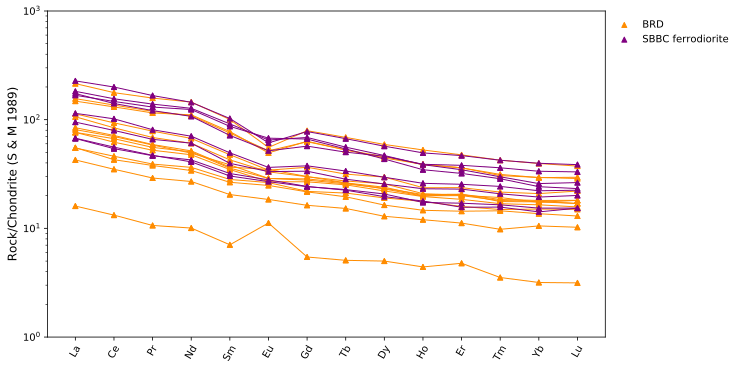

In [5]:
fig, ax = plt.subplots(1, figsize = (10, 6))

BB_REE_plot = pyroplot(whole_rock_geochem_BB)
SB_REE_plot = pyroplot(whole_rock_geochem_SB)
IR_REE_plot = pyroplot(whole_rock_geochem_IR)
Ke_REE_plot = pyroplot(whole_rock_geochem_Ke)

ax = BB_REE_plot.spider(ax=ax, mode = 'plot', color = 'darkorange', marker = '^', label = 'BRD')
ax = SB_REE_plot.spider(ax=ax, mode = 'plot', color = 'purple', marker = '^', label = 'SBBC ferrodiorite')

ax.set_ylim(1, 1000)
ax.set_ylabel('Rock/Chondrite (S & M 1989)')
plt.legend()
plt.show(fig)

## REE comparison between Greenstone Flow on Keweenaw Peninsula and Isle Royale

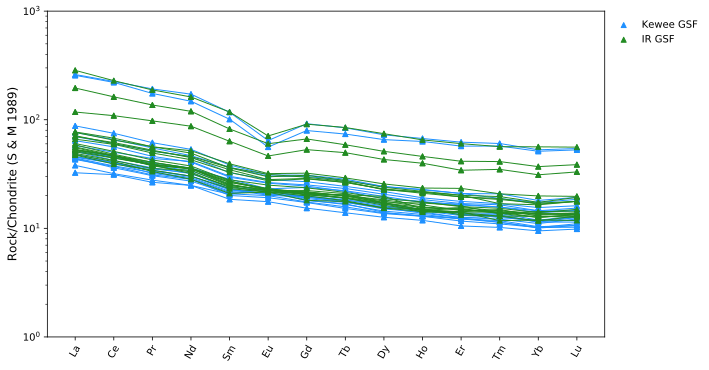

In [6]:
fig, ax = plt.subplots(1, figsize = (10, 6))

ax = Ke_REE_plot.spider(ax=ax, mode = 'plot', color = 'dodgerblue', marker = '^', label = 'Kewee GSF')
ax = IR_REE_plot.spider(ax=ax, mode = 'plot', color = 'forestgreen', marker = '^', label = 'IR GSF')

ax.set_ylim(1, 1000)
ax.set_ylabel('Rock/Chondrite (S & M 1989)')
plt.legend()
plt.show(fig)

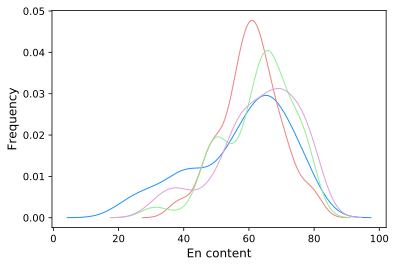

In [7]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
En_ax = sns.distplot(cpx_cat_SBBC.En.tolist(), bins = bins, hist=False, kde = True, color = 'dodgerblue', hist_kws={"alpha": 0.5})
En_ax = sns.distplot(cpx_cat_NBBC.En.tolist(), bins = bins, hist=False, kde = True, color = 'lightcoral', ax = En_ax, hist_kws={"alpha": 0.5})
En_ax = sns.distplot(cpx_cat_Keweenaw.En.tolist(), bins = bins, hist=False, kde = True, color = 'lightgreen', ax = En_ax, hist_kws={"alpha": 0.5})
En_ax = sns.distplot(cpx_cat_IR.En.tolist(), bins = bins, hist=False, kde = True, color = 'plum', ax = En_ax, hist_kws={"alpha": 0.5})
# En_ax.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# En_ax.set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90])
En_ax.set_xlabel('En content')
En_ax.set_ylabel('Frequency')
plt.show(En_ax)

## Enstatite content comparison in clinopyroxene

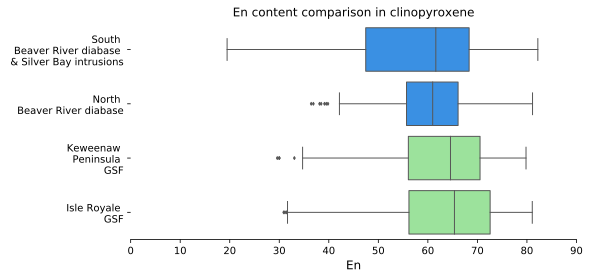

In [8]:
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8,4))

ax = sns.boxplot(x="En", y="Location", data=cpx_cat,fliersize=2, width=0.8,
            palette=['dodgerblue','dodgerblue','lightgreen','lightgreen'])

ax.set(ylabel="")
ax.set_xlim(0, 90)
ax.set_yticklabels(['South \n Beaver River diabase \n & Silver Bay intrusions', 'North \n Beaver River diabase',  'Keweenaw \n Peninsula \n GSF', 'Isle Royale \n GSF'])
for tick in ax.yaxis.get_major_ticks():

    tick.label1.set_horizontalalignment('right')
sns.despine(trim=True, left=True)
plt.title('En content comparison in clinopyroxene')
plt.savefig('code_output/geochem/En_px_comparison.pdf', bbox_inches='tight')
plt.show()

## Forsterite content comparison in olivine

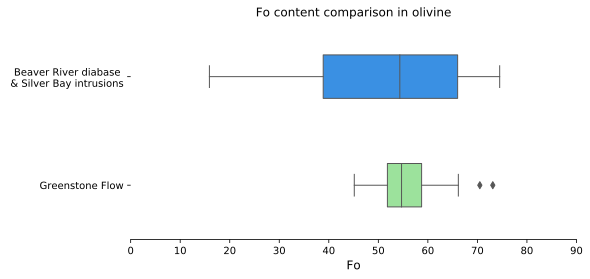

In [9]:
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8,4))

sns.boxplot(x="Fo", y="Unit", data=ol_cat, width=0.4,
             palette=['dodgerblue','lightgreen'])

ax.set(ylabel="")
ax.set_xlim(0, 90)
ax.set_yticklabels([ 'Beaver River diabase \n & Silver Bay intrusions', 'Greenstone Flow',])
sns.despine(trim=True, left=True)
plt.title('Fo content comparison in olivine')
plt.savefig('code_output/geochem/Fo_ol_comparison.pdf', bbox_inches='tight')
plt.show()

In [10]:
cpx_cat.head()

,Sample,CAT SUM,Si,Al,Na,Ca,Cr,Fe,Mg,K,Ti,Mn,Total,Mg#,Location,En
0,SBI10-CPX-1,2.28,2.00,0.05,0.02,0.65,0.0,0.54,0.67,0.0,0.02,0.01,3.97,55.4,South BBC,55.371901
1,SBI10-CPX-2,2.24,2.00,0.05,0.02,0.72,0.0,0.38,0.76,0.0,0.03,0.01,3.96,66.6,South BBC,66.666667
2,SBI10-CPX-3,2.27,2.02,0.04,0.02,0.71,0.0,0.48,0.65,0.0,0.02,0.01,3.95,57.3,South BBC,57.522124
3,SBI10-CPX-4,2.27,1.99,0.06,0.02,0.68,0.0,0.47,0.71,0.0,0.03,0.01,3.97,60.3,South BBC,60.169492
4,SBI10-CPX-5,2.25,1.98,0.08,0.02,0.69,0.0,0.41,0.75,0.0,0.03,0.01,3.96,64.7,South BBC,64.655172


## Anorthite comparison in plagioclase (by unit)

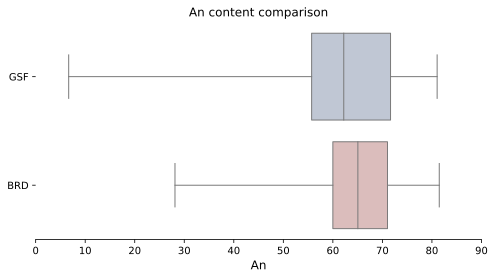

In [11]:
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x="An", y="Unit", data=pl_cat,
            whis=[0, 100], palette="vlag")

ax.set(ylabel="")
ax.set_xlim(0, 90)
sns.despine(trim=True, left=True)
plt.title('An content comparison')
plt.show()

## Anorthite comparison in plagioclase (by location in xenoliths)

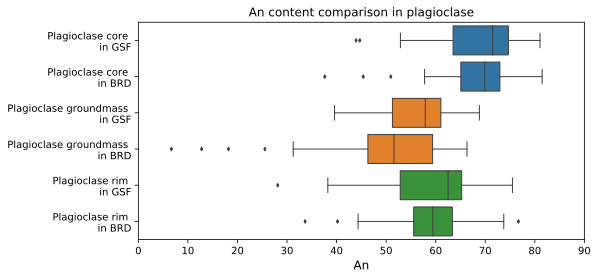

In [12]:
pl_cat = pl_cat.sort_values('loc')
# sns.set(style="ticks")
f, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x="An", y="Megacryst_loc", data=pl_cat,fliersize=2.5,
            palette=['C0', 'C0', 'C1','C1', 'C2','C2'])

ax.set(ylabel="")
ax.set_xlim(0, 90)
ax.set_yticklabels(['Plagioclase core \n in GSF', 'Plagioclase core \n in BRD', 'Plagioclase groundmass \n in GSF', 'Plagioclase groundmass \n in BRD', 'Plagioclase rim \n in GSF', 'Plagioclase rim \n in BRD'])
plt.title('An content comparison in plagioclase')
plt.savefig('code_output/geochem/An_plag_comparison.pdf', bbox_inches='tight')

plt.show()